# Task 2 : Building the baseline model

In [9]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, Dropout, Input, Flatten, Dense, MaxPooling2D
import matplotlib.pyplot as plt
from funcs_Task1 import training_data_Pipeline, test_validation_data_Pipeline

In [10]:
# constants
img_height = img_width = 128
batch_size = 32
img_size = (img_height, img_width)

train_dir = 'covid xray/train'
val_dir = 'covid xray/val'
test_dir = 'covid xray/test'

epochs = 30

### 1. Set up the classification

In [11]:

# Set random seeds for reproducibility
np.random.seed(123)  
tf.random.set_seed(123) 

# evaluation metrics
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),  # Accuracy metric
    tf.keras.metrics.AUC(name='auc')  # Area Under Curve metric
]

### 2. Build initial model


In [12]:
# Step 2: Build Initial Model
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

# Convolutional Part
model.add(layers.Input(shape=(128, 128, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  # First conv layer
model.add(layers.MaxPooling2D(2, 2))                          # Pooling
model.add(layers.BatchNormalization())                        # Normalization
model.add(layers.Conv2D(64, (3, 3), activation='relu'))      # Second conv layer
model.add(layers.MaxPooling2D(2, 2))                          # Pooling

# Fully Connected Part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))          # Dense layer
model.add(layers.Dropout(0.5))                                # Dropout layer

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))             # Binary classification

# Compile model
#model.compile(optimizer='adam',loss='binary_crossentropy', metrics=METRICS)


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,049 (14.14 MB)

 Trainable params: 3,705,985 (14.14 MB)

 Non-trainable params: 64 (256.00 B)

### 3. Train your model

In [13]:
# Use existing data pipelines
train_data_gen = training_data_Pipeline(batch_size, img_size, train_dir)
val_data_gen = test_validation_data_Pipeline(batch_size, img_size, test_dir=val_dir, train_dir=train_dir)

# Get sample counts (if not already defined)
total_train = train_data_gen.samples
total_val = val_data_gen.samples

# Compile the model (keep your existing METRICS)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=METRICS
)

# Train the model
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    verbose=1
)




Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/30


c:\Users\Marcin\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 305ms/step - accuracy: 0.6018 - auc: 0.6159 - loss: 2.3127 - val_accuracy: 0.6925 - val_auc: 0.7646 - val_loss: 0.6556
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 300ms/step - accuracy: 0.7386 - auc: 0.8388 - loss: 0.4966 - val_accuracy: 0.7450 - val_auc: 0.8351 - val_loss: 0.6197
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step - accuracy: 0.7733 - auc: 0.8679 - loss: 0.4548 - val_accuracy: 0.6550 - val_auc: 0.8490 - val_loss: 0.6439
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step - accuracy: 0.7794 - auc: 0.8691 - loss: 0.4519 - val_accuracy: 0.7125 - val_auc: 0.8534 - val_loss: 0.5770
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step - accuracy: 0.7309 - auc: 0.8517 - loss: 0.4669 - val_accuracy: 0.7875 - val_auc: 0.8801 - val_loss: 0.5111
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 298ms/step - accuracy: 0.8003 - auc: 0.8866 - loss: 0.4287 - val_accuracy: 0.7200 - val_auc: 0.7967 - val_loss: 0.5959
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 299

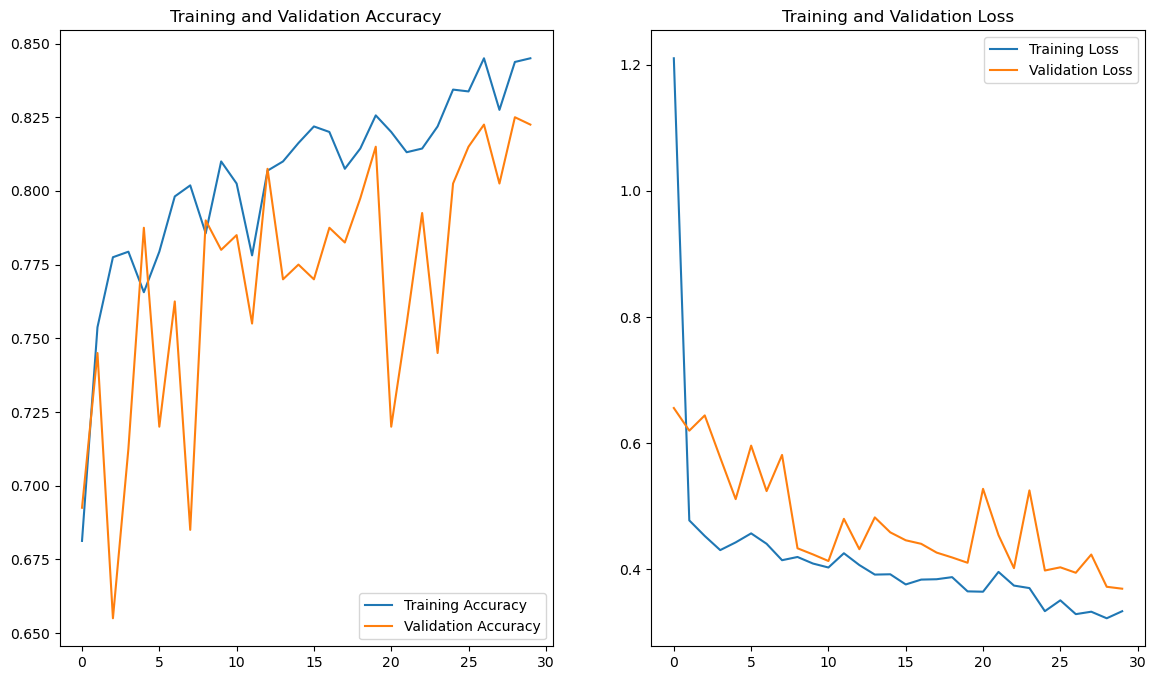

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()